# **6.8701 | 6.8710 | HST.507**

#**Fall 2022 Problem Set 4: Alleles and Arrays**

Due: Friday, November 11 at 11:59PM (submit copy of notebook to Stellar)

#Load libraries


In [92]:
from google.colab import files
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import linregress as linreg 
from scipy.stats import pearsonr


# Finding eQTLs

In this problem, we will examine the sources of variation in gene expression that partition a population into subpopulations.

You will need to download the following [files](https://www.dropbox.com/sh/csmgittpy4ub15t/AABnqBgWYKwiFzUVPCpTPE_Qa?dl=0) and upload them to colab using the following code block.

In [2]:
eQTLs = files.upload()

Saving ExpData.txt to ExpData.txt
Saving SnpData.txt to SnpData.txt


You are free to use the following function to help you process the raw `ExpData.txt` and `SnpData.txt` files.

In [93]:
# Processes *Data.txt files
"""
Example inp:
    Patient Trait1 Trait2 Trait3
    A 0.1 0.2 0.3
    B 0.4 0.5 0.6
    C 0.7 0.8 0.9

process_file(inp, "patient")
    [[0.1, 0.2, 0.3], [0.4, 0.5, 0.6], [0.7, 0.8, 0.9]]

process_file(inp, "trait")
    {"Trait1": [0.1, 0.4, 0.7], "Trait2": [0.2, 0.5, 0.8], "Trait3": [0.3, 0.6, 0.9]}
"""
def process_file(inp, mode):
    rows = inp.decode("utf-8").split("\n")
    if mode == "patient":
        return [[float(val) for val in row.split()[1:]] for row in rows[1:] if row]
    elif mode == "trait":
        res = pd.DataFrame([row.split()[1:] for row in rows if row])
        res.columns = res.iloc[0]
        return {k: [float(val) for val in v.values()] for k, v in res[1:].to_dict().items()}

#process_file(eQTLs["SnpData.txt"], "patient")
#process_file(eQTLs["SnpData.txt"], "trait")
#process_file(eQTLs["ExpData.txt"], "patient")
#process_file(eQTLs["ExpData.txt"], "trait")

Use the following code block if you would like to process the raw `ExpData.txt` and `SnpData.txt` files in your own way.

In [ ]:
### YOUR CODE HERE ###

A) The `ExpData.txt` file contains log-normalized RNA-seq expression data from our population of 1,000 samples, with 5,000 genes profiled for each sample. Do a principal components analysis on this dataset to find the clusters of samples that have similar patterns of gene expression. Plot the output of your analysis.
In your plots, be sure the axes are labeled with the components you are displaying in each plot. Also make sure that at least one of your plots colours the points corresponding to the samples with the sub-population that you think they should belong to. (Hint: You can re-use your $k$-means code from PSET 3 to find these sub-populations!)

Describe the patterns that you observe. What is the structure inherent in this population?

You may find the `matplotlib.pyplot` and `sklearn.decomposition.PCA` packages (already imported) to be useful.

In [94]:
def assignPoints(tbl, ctrs):
    """Assign each of the points in tbl to the cluster with center in ctrs"""

    ptsAsgn = []

    ### YOUR CODE HERE ###
    for x in tbl:
      dis_diff=[] 
      for c in ctrs: 
        dis=(x[0]-c[0])**2 + (x[1]-c[1])**2
        dis_diff.append(dis)
      min_arg=np.argmin(dis_diff)
      ptsAsgn.append(min_arg) 

    return ptsAsgn


def recalculateCtrs(tbl, ctrs, ptsAsgn):
    """Update the centroids based on the points assigned to them"""

    newCtrs = []
    
    ### YOUR CODE HERE ###
    for i in range(len(ctrs)):
      x_ctrs=[]
      y_ctrs=[]
      for j in range(len(ptsAsgn)): 
        if i==ptsAsgn[j]: 
          x_ctrs.append(tbl[j][0])
          y_ctrs.append(tbl[j][1])
      x_avg=sum(x_ctrs)/len(x_ctrs)
      y_avg=sum(y_ctrs)/len(y_ctrs)

      newCtrs.append([x_avg,y_avg])



    return newCtrs

def run_kmeans(dataTable):
    """initializes centroids, stop criterion and step counting for clustering"""
    newCtrs = [ [-5, -5], [0,0]]
    ptMemb = assignPoints(dataTable, newCtrs)
    stopCrit = False
    stepCount = 0

    """performs k-means clustering, plotting the clusters at each step"""
    while not stopCrit:
        stepCount += 1

        plotClusters(dataTable, ptMemb, newCtrs, stepCount)

        ### YOUR CODE HERE ###
        oldCtrs=newCtrs
        ptMemb = assignPoints(dataTable, oldCtrs)
        newCtrs=recalculateCtrs(dataTable, oldCtrs, ptMemb)

        """stop criterion - when centroids' total movement after a step is below
            the threshold, stop the algorithm"""
        stopDist = 0;
        for i in range(len(newCtrs)):
            stopDist += np.linalg.norm(np.array(oldCtrs[i]) - np.array(newCtrs[i]))
        if stopDist < 5:
            stopCrit = True

###########################
# NO NEED TO MODIFY BELOW #
###########################


def plotClusters(tbl, ptMemb, cntrs, stepCnt):
    """Generate a scatterplot of the current k-means cluster assignments"""

    pt_colors = ["salmon", "lightgreen", "lightblue"]
    ctr_colors = ["red", "green", "blue"]
    for i in range(len(cntrs)):
        pts = [tbl[j] for j in range(len(tbl)) if ptMemb[j] == i]
        plt.scatter([pt[0] for pt in pts], [pt[1] for pt in pts], color = pt_colors[i], s = 10)
        plt.scatter([cntrs[i][0]], [cntrs[i][1]], color = ctr_colors[i], s = 100, facecolors = "none")
    plt.title("Step " + str(stepCnt))
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.show()

In [95]:
### YOUR CODE HERE ###

X=np.array(process_file(eQTLs["ExpData.txt"], "patient"))

print(X.shape)

(1000, 5000)


(1000, 5000)
(1000, 2)
(1000,)
(1000,)


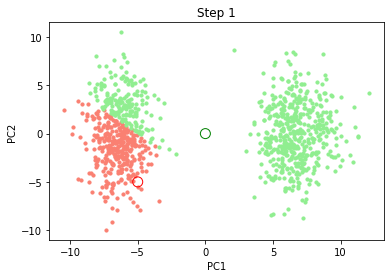

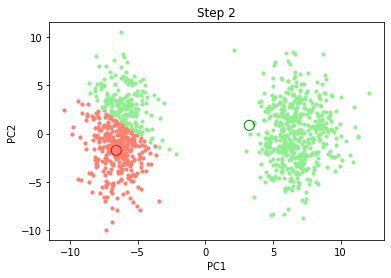

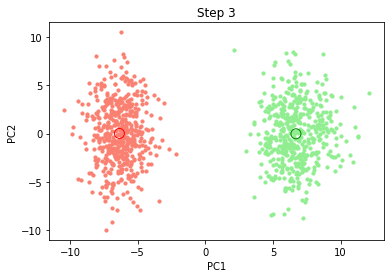

In [96]:
### YOUR CODE HERE ###


pca = PCA(n_components=2)

low_dim_X=pca.fit_transform(X)
PC1=low_dim_X[:,0]
PC2=low_dim_X[:,1]

print(X.shape)
print(low_dim_X.shape)
print(PC1.shape)
print(PC2.shape)

run_kmeans(low_dim_X)


**Answer here:**

The group divides into two dijoint sub groups. Moreover, it looks like they are separated by a physical barier, and likely they are under distint selection pressure. 

B) The `SnpData.txt` file contains genotyping data for the same 1,000 samples across 500 SNPs. Each SNP's genotype has been called with reference to the same reference genotype; "0" thus represents the reference allele, "2" represents the non-reference allele, and "1" represents a different allele on each strand.

You will find that some of the SNPs (more than 5, less than 100) are eQTLs, that is, they have an effect on the expression of one or more of the genes we collected expression data for. Using whatever model you see fit, search for these eQTLs using the genotyping data and the expression data. **You may not have the computational resources to test all combinations of SNPs and genes, so you should think about smart ways to choose subsets of each to find some eQTLs - you don't have to find all of them!**

For three of the eQTLs you found, present the evidence you have for why you think it is an eQTL, and not just associated with the expression of a gene by chance alone. *Be sure to include plots in your analysis to support your hypothesis, and to thoroughly explain the method you used to find eQTLs.* You can assume that the association between genotype and expression is linear for eQTLs. *Don't forget that you should be correcting for the fact that you are performing multiple significance tests.*

In [21]:
### YOUR CODE HERE ###
# X_snp_patient=process_file(eQTLs["SnpData.txt"], "patient")
X_snp_trait=process_file(eQTLs["SnpData.txt"], "trait")
X_gene_trait=process_file(eQTLs["ExpData.txt"], "trait")
X_snp_patient=process_file(eQTLs["SnpData.txt"], "patient")
X_gene_patient=process_file(eQTLs["ExpData.txt"], "patient")



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: DataFrame columns are not unique, some columns will be omitted.


In [70]:
X_pd_gene=pd.DataFrame(X_gene_trait)
print(X_pd_gene.shape)
#cleaning the data; eliminiting genes that do not vary
gene_stds = np.var(X_pd_gene, axis=0)
X_clean_gene = X_pd_gene.loc[:, gene_stds >2]
print(X_clean_gene.shape)

(1000, 4993)
(1000, 30)


In [90]:
ans=[]
for snp in X_snp_trait.keys():
  for i in range(30):
    _, _, _, p_value, _=linreg(np.array(X_clean_gene[X_clean_gene.columns[i]]),np.array(X_snp_trait[snp])) #p value for each snp and cleaned genes 
    if p_value<0.05/(500*30): #p value cutoff <0.05/(# of comparisions)
      if snp not in ans:
        ans.append(snp)



In [91]:
print(len(ans))
print(ans)

13
['SNP_46', 'SNP_48', 'SNP_84', 'SNP_112', 'SNP_119', 'SNP_157', 'SNP_211', 'SNP_214', 'SNP_217', 'SNP_230', 'SNP_318', 'SNP_343', 'SNP_473']


**Answer here:**

Assumming the association between genotype and expression is linear for eQTLs, I am doing linear regression between each snp for all the individuals and each genes for all the individuals. However, before calculating linear regression for all the genes, I am eliminiting the genes that do not vary(variance<$2$) because those genes likely represent housekeeping genes. Similarly, I am collecting the snps with p value less than 0.05/(# of comparision, that is, 500*30). Lastly, I am picking first three snps from the final list. 

eQTL 1: 'SNP_46'

eQTL 2: 'SNP_48'

eQTL 3: 'SNP_84'

C) In the above analysis, we were forced to consider all pairs of SNPs and genes to identify eQTLs. What sources of data that have not been provided as part of this problem would have been useful in constraining the amount of such pairs you had to test? For at least two sources:

i. Give a description of what the dataset would look like (i.e. what are the rows and columns of the data matrix? what kinds of values are stored in the matrix?).

ii. Explain how you would use it to filter out pairs of SNPs and genes that are unlikely to be associated with one another.

**Answer here**:

Source 1: Presence or absence of the phenotype we are measuring for individual, for example, Type 2 Diabetes. 

i. Row: the same 1000 individuals; columns: presence or absence of T2D in the person (0 or 1)

ii. It would help us remove the individuals that lack the phenotype

Source 2: Whether SNPs are from functional region or non functional region

i. Row: All the SNPs; columns: SNPs from functional or non-functional regions(0,1)

ii. It would help us remove the SNPs that are non-consequential 